In [ ]:
#This task is to classify and predict the variety of flower based on the inputs like sepal_length ,sepal_width ,petal_length,petal_width
#classifying algorithms can be used here i have used logistic regression and decision tree and checked for accuracies.

In [1]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\intership2024\Iris_Classification\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#data cleaning check fo duplicates nulls etc.

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

3

In [7]:
#have to drop the duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [ ]:
#EDA cand be done to analyse the data and their features

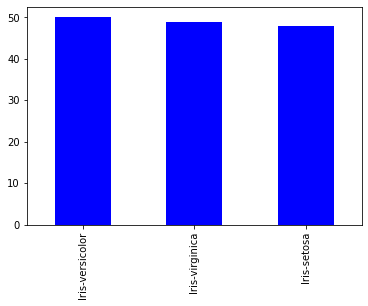

In [10]:

df['species'].value_counts().plot(kind='bar',color='b')
plt.show()

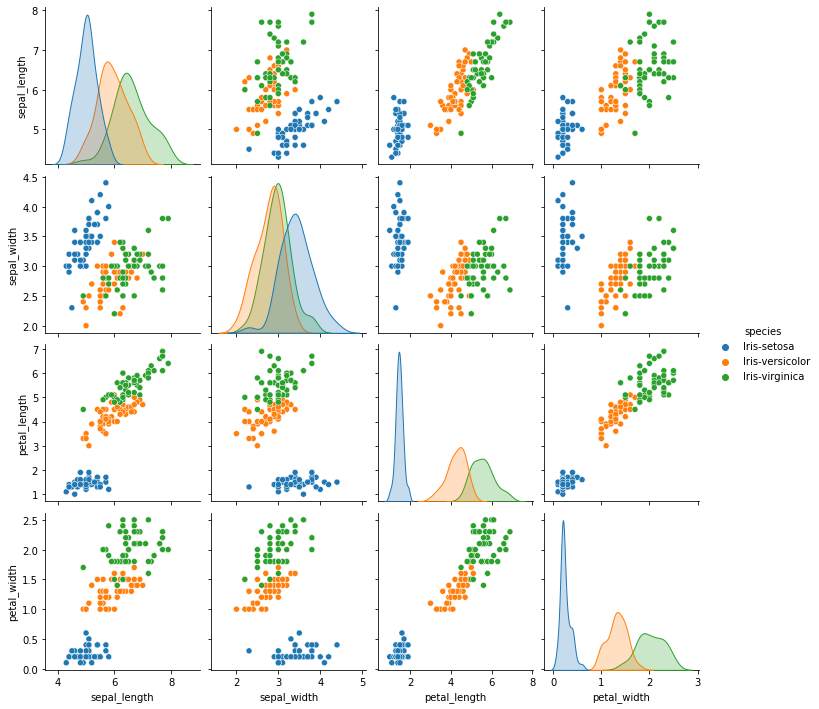

In [11]:
#pairplot gives us the relation between the variables and generally gives the idea of dataset in a picture
sns.pairplot(df,hue='species')
plt.show()

In [ ]:
# Model building 
#A specific model is choosed to predict the variety by spliting the dataset to train and test and check the accuracy

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
#label encoding is done onvert categorical data into numerical data. 
#This is often necessary for machine learning models because many algorithms require numerical input
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
#will seperate the input variable cols and output cols
x = df.drop('species',axis=1)
y = df['species']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=1)

In [ ]:
#LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#ACCURACY 

In [20]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score(Logistic Regression):",accuracy*100)

Accuracy score(Logistic Regression): 93.33333333333333


In [21]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Logistic Regression) is:\n', cls_report)

classification report for our model(Logistic Regression) is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
#With 93.3 percentage accuracy the model is predicting the species accurately we can furthur balance and check the scores.